# Placement Prediction

In [1]:
# Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split , StratifiedKFold , KFold , cross_val_score , GridSearchCV , RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , OrdinalEncoder , StandardScaler , MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score , precision_score , recall_score , confusion_matrix , accuracy_score

In [3]:
# Load The Dataset

In [4]:
dataset = pd.read_csv("placement_dataset.csv")

In [5]:
dataset.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [7]:
dataset.shape

(10000, 12)

In [8]:
dataset.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


In [9]:
# Data Preprocessing

In [10]:
dataset.drop(columns=['StudentID'],inplace=True)

In [11]:
dataset["PlacementStatus"]= dataset["PlacementStatus"].replace('NotPlaced','Not Placed')

In [12]:
dataset["PlacementStatus"].unique()

array(['Not Placed', 'Placed'], dtype=object)

In [13]:
# Checking Null Values

In [14]:
dataset.isnull().sum()

CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [15]:
# Removing Duplicate rows

In [16]:
dataset.duplicated().sum()

72

In [17]:
dataset.drop_duplicates(inplace=True)

In [18]:
# Ouliers

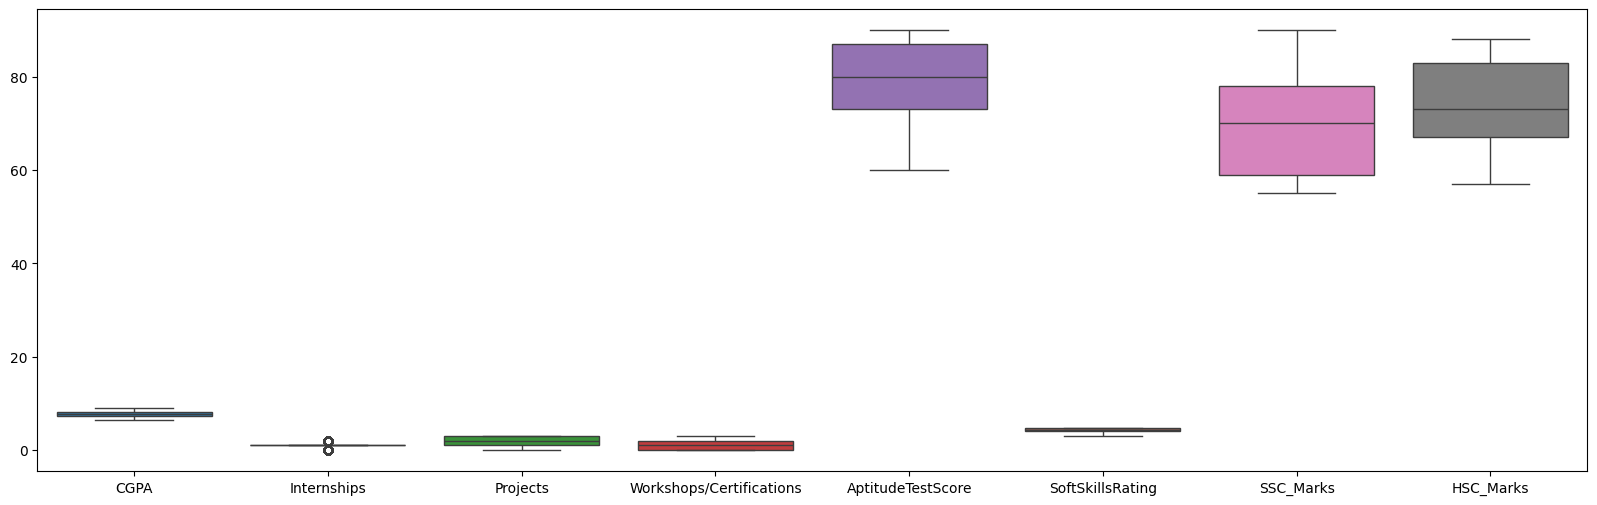

In [19]:
plt.figure(figsize=(20,6))
sns.boxplot(dataset[dataset.select_dtypes(include=['int64','float64']).columns])
plt.show()

In [20]:
# Spliting The Data Into Train And Test

In [21]:
x = dataset.iloc[:,:-1]
y = dataset[["PlacementStatus"]]

In [22]:
X_train , x_test , Y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

In [23]:
print(f"Testing Shape : {x_test.shape}")
print(f"Trainging Shape : {X_train.shape}")

Testing Shape : (1986, 10)
Trainging Shape : (7942, 10)


In [24]:
# Encoding chategorical Data

In [25]:
categorical_columns = X_train.select_dtypes(include='object').columns
numeric_columns = X_train.select_dtypes(include=['int64','float64']).columns

In [26]:
encoder = OneHotEncoder(drop='first',sparse_output=False)

In [27]:
X_train[categorical_columns] = encoder.fit_transform(X_train[categorical_columns])
x_test[categorical_columns] = encoder.transform(x_test[categorical_columns])

In [28]:
# Scaling The Numeric Data

In [29]:
scaler = MinMaxScaler()

In [30]:
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
x_test[numeric_columns] = scaler.transform(x_test[numeric_columns])

In [31]:
# Encoding Output Feature

In [32]:
output_encoder = OneHotEncoder(drop='first',sparse_output=False)

In [33]:
Y_train = output_encoder.fit_transform(Y_train)
y_test = output_encoder.transform(y_test)

In [34]:
# Model Training

In [35]:
# Balancing The Class Distribution

In [36]:
value , count = np.unique(Y_train , return_counts=True)
before = dict(zip(value ,count))
print(f"Before Class Distribution {before}")

Before Class Distribution {0.0: 4613, 1.0: 3329}


In [37]:
print(f"Shape before : {Y_train.shape}")

Shape before : (7942, 1)


In [38]:
sm = SMOTE()

In [39]:
x_train , y_train = sm.fit_resample(X_train , Y_train)

In [40]:
value2 , count2 = np.unique(y_train , return_counts=True)
after = dict(zip(value2 , count2))
print(f"After Class Distribution : {after}")
print(f"Shape After {x_train.shape}")

After Class Distribution : {0.0: 4613, 1.0: 4613}
Shape After (9226, 10)


In [41]:
models = {

    'Logistic Regression' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'SVM' : SVC(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'GradientBoost':GradientBoostingClassifier(),
    'XGBoost':xgb.XGBClassifier()
}

In [42]:
for name , model in models.items():
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    print(f"{name} | Accuracy Score : {accuracy_score(y_test , y_pred)*100:.3f}%")
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model , x_train , y_train , cv=cv , scoring='f1')
    print(f"{name} | Mean F1-Score After CV : {np.mean(scores)*100:.3f}\n")
    cm = confusion_matrix(y_test , y_pred)
    print(cm,'\n')

Logistic Regression | Accuracy Score : 79.456%
Logistic Regression | Mean F1-Score After CV : 79.794

[[907 281]
 [127 671]] 

KNN | Accuracy Score : 76.989%
KNN | Mean F1-Score After CV : 78.703

[[895 293]
 [164 634]] 

SVM | Accuracy Score : 78.751%
SVM | Mean F1-Score After CV : 79.719

[[903 285]
 [137 661]] 

Decision Tree | Accuracy Score : 70.443%
Decision Tree | Mean F1-Score After CV : 73.698

[[861 327]
 [260 538]] 

Random Forest | Accuracy Score : 79.104%
Random Forest | Mean F1-Score After CV : 80.986

[[958 230]
 [185 613]] 

AdaBoost | Accuracy Score : 80.262%
AdaBoost | Mean F1-Score After CV : 79.645

[[940 248]
 [144 654]] 

GradientBoost | Accuracy Score : 80.312%
GradientBoost | Mean F1-Score After CV : 81.180

[[944 244]
 [147 651]] 

XGBoost | Accuracy Score : 78.953%
XGBoost | Mean F1-Score After CV : 80.533

[[958 230]
 [188 610]] 



In [43]:
# best Model

In [44]:
best_model = LogisticRegression(C= 0.01, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
best_model.fit(x_train , y_train)
y_pred = best_model.predict(x_test)

In [45]:
# Model Evaluation

In [46]:
print(f"Training Score : {best_model.score(x_train , y_train)*100}%")
print(f"Testing Score : {best_model.score(x_test , y_test)*100}%")
print("Accuracy Score :",accuracy_score(y_pred,y_test)*100)
print("Recall Score :",round(recall_score(y_pred,y_test)*100,3))
print("Precsion Score :",round(precision_score(y_pred,y_test)*100,3))
print("F1 Score :",round(f1_score(y_pred,y_test)*100,3))

Training Score : 78.21374376761327%
Testing Score : 77.19033232628398%
Accuracy Score : 77.19033232628398
Recall Score : 66.507
Precsion Score : 87.093
F1 Score : 75.421


In [47]:
# confusion Matrix

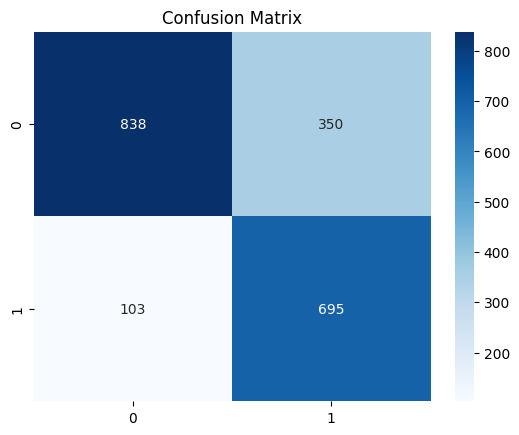

In [48]:
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(data=cm , annot=True , fmt='g',cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [49]:
# Features Importance

In [50]:
from sklearn.inspection import permutation_importance

result = permutation_importance(best_model, x_test, y_test, n_repeats=10, random_state=42)

importance_df = pd.DataFrame({
    'Feature': x_test.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print(importance_df)


                     Feature  Importance
6  ExtracurricularActivities    0.019134
4          AptitudeTestScore    0.011329
8                  SSC_Marks    0.009869
9                  HSC_Marks    0.009063
2                   Projects    0.006697
0                       CGPA    0.006395
3   Workshops/Certifications    0.004582
5           SoftSkillsRating    0.001561
7          PlacementTraining    0.001309
1                Internships    0.000000


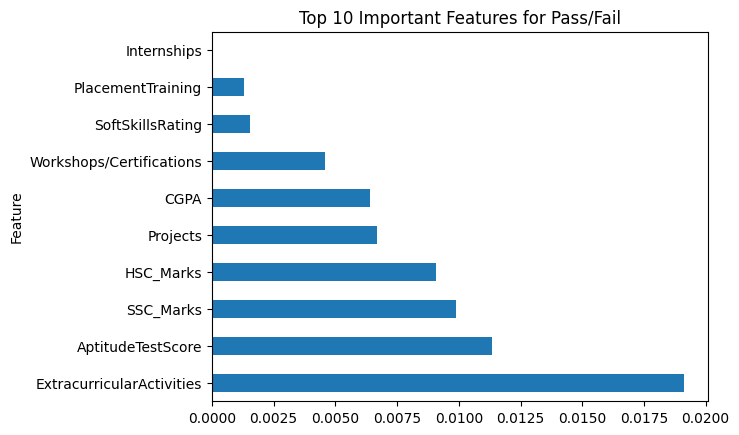

In [51]:
import matplotlib.pyplot as plt

importance_df.head(10).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title("Top 10 Important Features for Pass/Fail")
plt.show()

In [52]:
# Hyper parameter Tuning

In [53]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

grid = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=5, scoring='precision')
grid.fit(x_train, y_train)

print(grid.best_params_)
print(grid.best_score_)


{'C': 1, 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}
0.7878949420410644


In [54]:
final_model = LogisticRegression(C= 0.01, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
final_model.fit(x_train , y_train)
y_pred = final_model.predict(x_test)

In [55]:
print(f"Training Score : {best_model.score(x_train , y_train)*100}%")
print(f"Testing Score : {best_model.score(x_test , y_test)*100}%")
print("Accuracy Score :",accuracy_score(y_pred,y_test)*100)
print("Recall Score :",round(recall_score(y_pred,y_test)*100,3))
print("Precsion Score :",round(precision_score(y_pred,y_test)*100,3))
print("F1 Score :",round(f1_score(y_pred,y_test)*100,3))

Training Score : 78.21374376761327%
Testing Score : 77.19033232628398%
Accuracy Score : 77.19033232628398
Recall Score : 66.507
Precsion Score : 87.093
F1 Score : 75.421


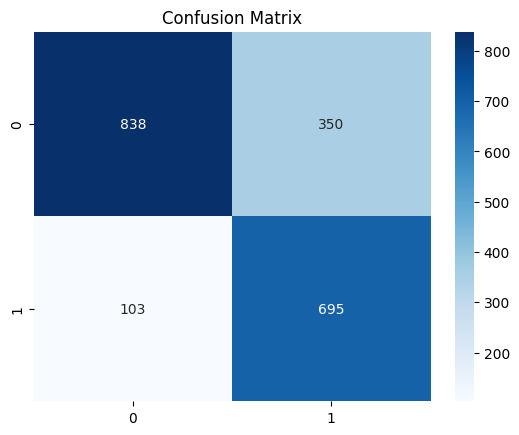

In [56]:
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(data=cm , annot=True , fmt='g',cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [57]:
# Saving Model For Deployment

In [58]:
joblib.dump(final_model , "placement_prd_model.pkl")
joblib.dump(encoder , "placement_prd_encoder.pkl")
joblib.dump(output_encoder , "placement_prd_output_encoder.pkl")
joblib.dump(scaler , "placement_prd_scaler.pkl")
print("Models Saved Successfuly.")

Models Saved Successfuly.
